In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torchvision import transforms as T
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import cv2
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import time

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import seaborn
from jupyterthemes import jtplot

os.environ['CUDA_VISIBLE_DEVICES'] = "0, 1, 2, 3"

In [ ]:
def select_aug(aug_list):
    transforms = []
    
    for i in aug_list:
        if i == 'ColorJitter':
            transforms.append(T.ColorJitter(brightness=.5, hue=.3))
        elif i == 'GaussianBlur':
            transforms.append(T.GaussianBlur(kernel_size = (3, 9), sigma = (0.1, 5)))
        elif i == 'RandomCrop':
            transforms.append(T.RandomCrop(500, 500))
        else:
            print('name error')
            return
    return T.Compose(transforms = transforms)

In [ ]:
import pydicom

In [ ]:
image_csv_path = '/tf/0.DATA/train_image_level.csv'
study_csv_path = '/tf/0.DATA/train_study_level.csv'

image_csv = pd.read_csv(image_csv_path)
study_csv = pd.read_csv(study_csv_path)

idx = np.random.randint(len(study_csv))

study_data = study_csv.iloc[idx]
query_st = study_data['id']
query_st = query_st.split('_')[0]

image_data = image_csv.query("StudyInstanceUID == @query_st")
image_name = image_data['id'].values[0].split('_')[0]

n = os.listdir('/tf/0.DATA/train/'+ query_st)[0]

dicom_path = '/tf/0.DATA/train/' + query_st + '/' + n + '/' + image_name + '.dcm'
dcm = pydicom.dcmread(dicom_path)

(2416, 2872)


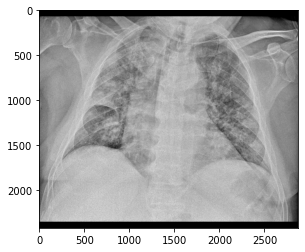

In [ ]:
image_o = dcm.pixel_array
plt.imshow(image_o, cmap='gray')
print(image_o.shape)

In [ ]:
type(image_o)

numpy.ndarray

In [ ]:
from PIL import Image

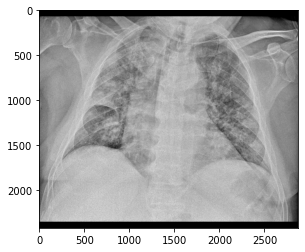

In [ ]:
plt.imshow(Image.fromarray(image_o), cmap='gray')

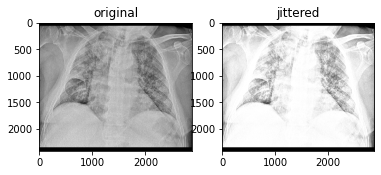

In [ ]:
# example image - ColorJitter
jitter = T.ColorJitter(brightness=.6, hue=.1)
jitted_imgs = jitter(Image.fromarray(image_o.astype('uint8')))

# original
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(Image.fromarray(image_o), cmap='gray')

# jittered
plt.subplot(1,2,2)
plt.title('jittered')
plt.imshow(jitted_imgs, cmap='gray')

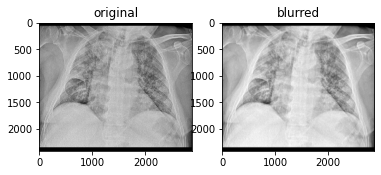

In [ ]:
# example image - GaussianBlur
blurrer = T.GaussianBlur(kernel_size=(101, 101), sigma=5)
blurred_imgs = blurrer(Image.fromarray(image_o))

# original
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(Image.fromarray(image_o), cmap='gray')

# blurred
plt.subplot(1,2,2)
plt.title('blurred')
plt.imshow(blurred_imgs, cmap='gray')

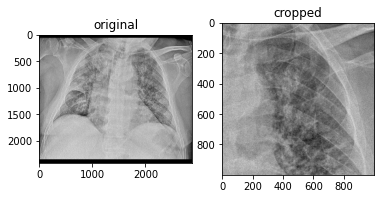

In [ ]:
cropper = T.RandomCrop(size=(1000, 1000))
crops = cropper(Image.fromarray(image_o))

# original
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(Image.fromarray(image_o), cmap='gray')

# cropped
plt.subplot(1,2,2)
plt.title('cropped')
plt.imshow(crops, cmap='gray')